# Exploratory Data Analysis (EDA)
This notebook performs EDA on the CSV data file located in the `temp` folder.

In [1]:
# Import Required Libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects

import descartes
import geopandas as gpd
from Levenshtein import distance
from itertools import product
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from scipy.spatial.distance import pdist, squareform
from shapely.geometry import Point, Polygon

import geoplot
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')



In [2]:

# Load the CSV Data
dir_path = 'temp/'
file_path = dir_path + 'US_Accidents_March23_sampled_500k.csv'
data = pd.read_csv(file_path)


# Display Basic Information
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Highway 19,Zachary,East Baton Rouge,LA,70791-4610,US,US/Central,KBTR,2019-06-12 09:53:00,77.0,77.0,62.0,29.92,10.0,NW,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,Incident on FOREST RIDGE DR near PEPPERIDGE PL...,Forest Ridge Dr,Sterling,Loudoun,VA,20164-2813,US,US/Eastern,KIAD,2022-12-03 23:52:00,45.0,43.0,48.0,29.91,10.0,W,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,Accident on W Central Ave from Floradale Ave t...,Floradale Ave,Lompoc,Santa Barbara,CA,93436,US,US/Pacific,KLPC,2022-08-20 12:56:00,68.0,68.0,73.0,29.79,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,Incident on I-90 EB near REST AREA Drive with ...,14th St NW,Austin,Mower,MN,55912,US,US/Central,KAUM,2022-02-21 17:35:00,27.0,15.0,86.0,28.49,10.0,ENE,15.0,0.0,Wintry Mix,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,River Blvd,Bakersfield,Kern,CA,93305-2649,US,US/Pacific,KBFL,2020-12-04 01:54:00,42.0,42.0,34.0,29.77,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


## Handle Missing Values

In [3]:
# Check for Missing Values
print(data.isnull().sum())
missing_values = data.isnull().sum()
print('missing values:')
missing_values[missing_values > 0]


ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                          0
Crossing

End_Lat                  220377
End_Lng                  220377
Description                   1
Street                      691
City                         19
Zipcode                     116
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Sunrise_Sunset             1483
Civil_Twilight             1483
Nautical_Twilight          1483
Astronomical_Twilight      1483
dtype: int64

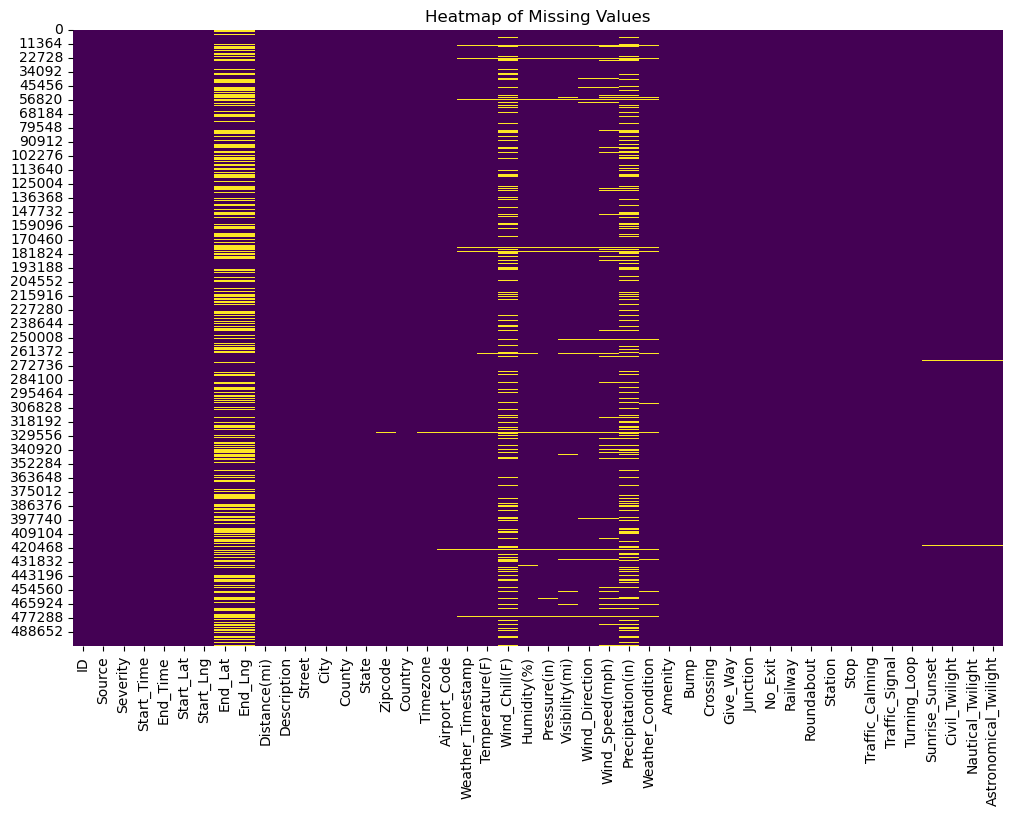

In [4]:
# Visualize Missing Values

plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [5]:
# Select Columns for Analysis

basic_columns = ['ID', 'Severity', 
                    'Start_Time', 'End_Time',
                    'Start_Lat', 'Start_Lng', 'Distance(mi)', 
                    'Street', 'City', 'State', 'Zipcode', 'Country', 'Timezone']

basic_df = data[basic_columns]
print(basic_df.info())
basic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            500000 non-null  object 
 1   Severity      500000 non-null  int64  
 2   Start_Time    500000 non-null  object 
 3   End_Time      500000 non-null  object 
 4   Start_Lat     500000 non-null  float64
 5   Start_Lng     500000 non-null  float64
 6   Distance(mi)  500000 non-null  float64
 7   Street        499309 non-null  object 
 8   City          499981 non-null  object 
 9   State         500000 non-null  object 
 10  Zipcode       499884 non-null  object 
 11  Country       500000 non-null  object 
 12  Timezone      499493 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 49.6+ MB
None


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,State,Zipcode,Country,Timezone
0,A-2047758,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,0.000,Highway 19,Zachary,LA,70791-4610,US,US/Central
1,A-4694324,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,0.056,Forest Ridge Dr,Sterling,VA,20164-2813,US,US/Eastern
2,A-5006183,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,0.022,Floradale Ave,Lompoc,CA,93436,US,US/Pacific
3,A-4237356,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,1.054,14th St NW,Austin,MN,55912,US,US/Central
4,A-6690583,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,0.046,River Blvd,Bakersfield,CA,93305-2649,US,US/Pacific


# convert column into correct type
## 1. Start_Time and End_Time into datetime 
Issue: the format is not intergrate, need to modify them

## 2. Severity into categorical type. 


## 3. Adding State Full Name


In [6]:
start_time = basic_df['Start_Time'].str.replace(r'\.\d+$', '', regex=True)
start_time = pd.to_datetime(start_time)
basic_df['Start_Time'] = start_time

end_time = basic_df['End_Time'].str.replace(r'\.\d+$', '', regex=True)
end_time = pd.to_datetime(end_time)
basic_df['End_Time'] = end_time
print(basic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            500000 non-null  object        
 1   Severity      500000 non-null  int64         
 2   Start_Time    500000 non-null  datetime64[ns]
 3   End_Time      500000 non-null  datetime64[ns]
 4   Start_Lat     500000 non-null  float64       
 5   Start_Lng     500000 non-null  float64       
 6   Distance(mi)  500000 non-null  float64       
 7   Street        499309 non-null  object        
 8   City          499981 non-null  object        
 9   State         500000 non-null  object        
 10  Zipcode       499884 non-null  object        
 11  Country       500000 non-null  object        
 12  Timezone      499493 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 49.6+ MB
None


In [7]:
severity_level = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Critical'}
basic_df['Severity'] = basic_df['Severity'].map(severity_level)
print(basic_df['Severity'].value_counts())


Severity
Medium      398142
High         84520
Critical     13064
Low           4274
Name: count, dtype: int64


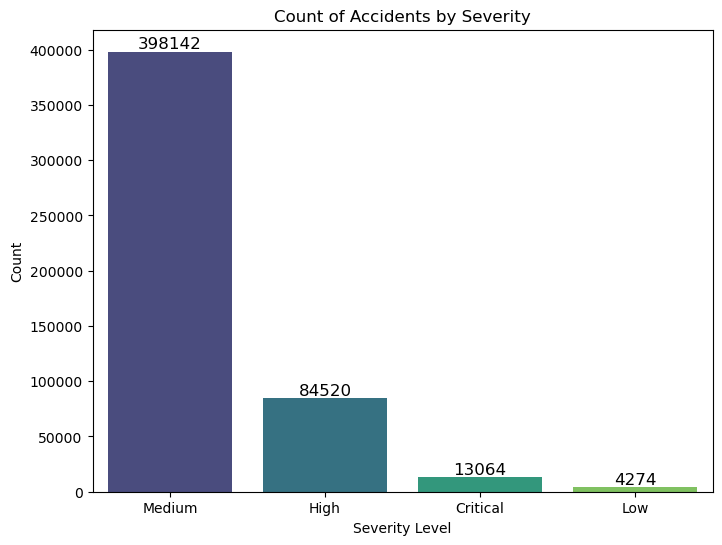

In [8]:
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size for better visibility
ax = sns.countplot(data=basic_df, x='Severity', palette='viridis')

# Add titles and labels for clarity
plt.title('Count of Accidents by Severity')
plt.xlabel('Severity Level')
plt.ylabel('Count')

# Adding count numbers on top of the bars
for p in ax.patches:
    height = p.get_height()  # Get the height (count) of each bar
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Position the text
            int(height),  # Value of the count
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment (above the bar)
            fontsize=12)  # Font size

# Display the plot
plt.show()

# check time trend for accidents


Year
2016     26663
2017     46514
2018     57578
2019     61852
2020     76155
2021    101740
2022    113734
2023     15764
Name: count, dtype: int64


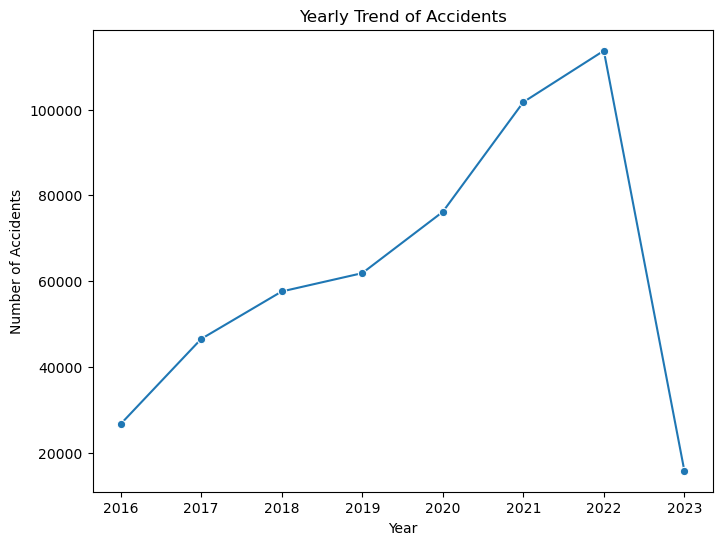

In [9]:
# year trend

basic_df['Year'] = basic_df['Start_Time'].dt.year
year_trend = basic_df['Year'].value_counts().sort_index()
print(year_trend)
plt.figure(figsize = (8, 6))
sns.lineplot(x = year_trend.index, y = year_trend.values, marker = 'o')
plt.title ('Yearly Trend of Accidents')
plt.xlabel ('Year')
plt.ylabel ('Number of Accidents')
plt.show()

Month
1     48553
2     42962
3     35557
4     38378
5     36154
6     36660
7     33363
8     38670
9     42255
10    43839
11    49020
12    54589
Name: count, dtype: int64


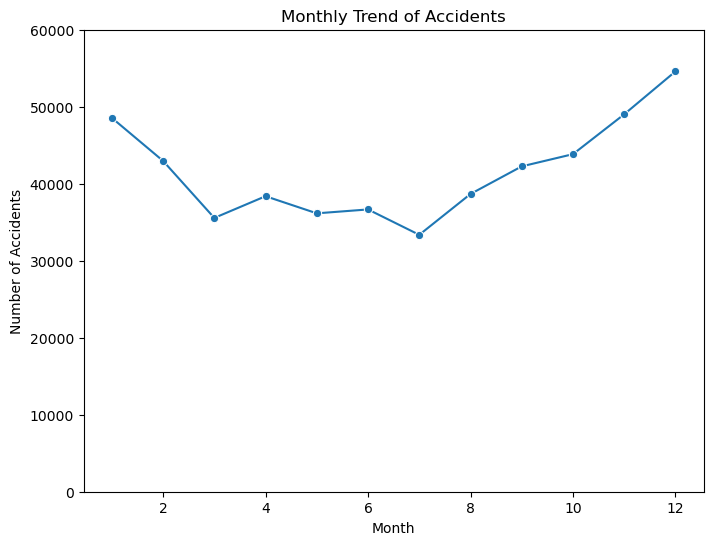

In [10]:
# month trend

basic_df['Month'] = basic_df['Start_Time'].dt.month
month_trend = basic_df['Month'].value_counts().sort_index()
print(month_trend)

plt.figure(figsize = (8, 6))
sns.lineplot(x = month_trend.index, y = month_trend.values, marker = 'o')
plt.title ('Monthly Trend of Accidents')
plt.xlabel ('Month')
plt.ylabel ('Number of Accidents')
plt.ylim(0, 60000)
plt.show()

Day_of_Week
Friday       88766
Monday       78456
Saturday     43384
Sunday       36140
Thursday     85216
Tuesday      83090
Wednesday    84948
Name: count, dtype: int64


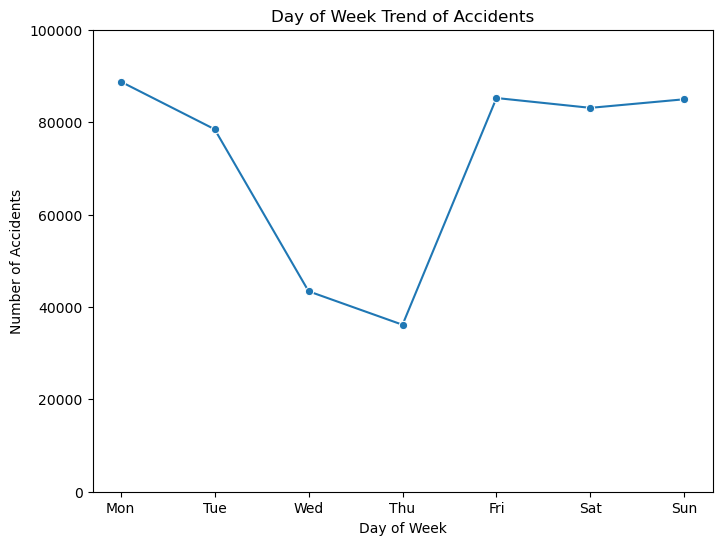

In [11]:
# day of week trend

basic_df['Day_of_Week'] = basic_df['Start_Time'].dt.day_name()
day_of_week_trend = basic_df['Day_of_Week'].value_counts().sort_index()
print(day_of_week_trend)

plt.figure(figsize = (8, 6))
sns.lineplot(x = day_of_week_trend.index, y = day_of_week_trend.values, marker = 'o')
plt.title ('Day of Week Trend of Accidents')
plt.xlabel ('Day of Week')
plt.ylabel ('Number of Accidents')
plt.ylim(0, 100000)
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Hour
0      7374
1      6265
2      6151
3      5425
4     10380
5     14754
6     26094
7     37988
8     37626
9     23523
10    22523
11    22765
12    22965
13    25400
14    28959
15    34126
16    37424
17    37099
18    27929
19    19115
20    14529
21    12421
22    10998
23     8167
Name: count, dtype: int64


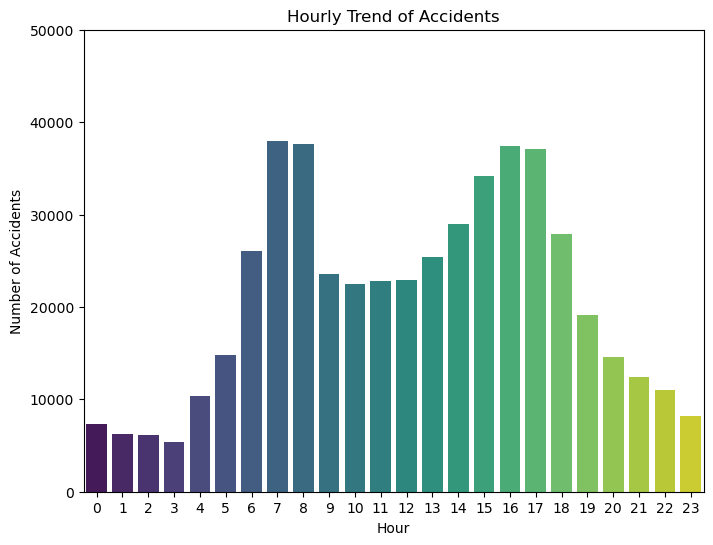

In [12]:
# hour trend
basic_df['Hour'] = basic_df['Start_Time'].dt.hour
hour_trend = basic_df['Hour'].value_counts().sort_index()
print(hour_trend)
plt.figure(figsize = (8, 6))
sns.barplot(x = hour_trend.index, y = hour_trend.values, palette = 'viridis')
plt.title ('Hourly Trend of Accidents')
plt.xlabel ('Hour')
plt.ylabel ('Number of Accidents')
plt.ylim(0, 50000)
plt.show()


Time_of_Day
Afternoon    148874
Evening       98672
Morning      185273
Night         67181
Name: count, dtype: int64


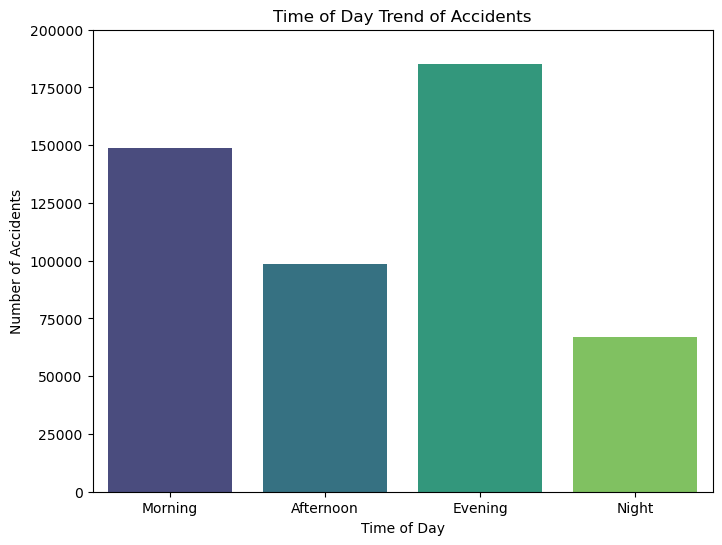

In [13]:
# time of day trend
def time_of_day(hour):
    if 5<= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
    
basic_df['Time_of_Day'] = basic_df['Hour'].apply(time_of_day)
tod_trend = basic_df['Time_of_Day'].value_counts().sort_index()
print(tod_trend)

plt.figure(figsize = (8, 6))
sns.barplot(x = tod_trend.index, y = tod_trend.values, palette = 'viridis')
plt.title ('Time of Day Trend of Accidents')
plt.xlabel ('Time of Day')
plt.ylabel ('Number of Accidents')
plt.xticks(range(4), ['Morning', 'Afternoon', 'Evening', 'Night'])
plt.ylim(0, 200000)
plt.show()



Traffic_Hour
Evening Rush             102452
Morning Rush              99137
Non-Rush Hour daytime    156738
Non-Rush Hour night      141673
Name: count, dtype: int64


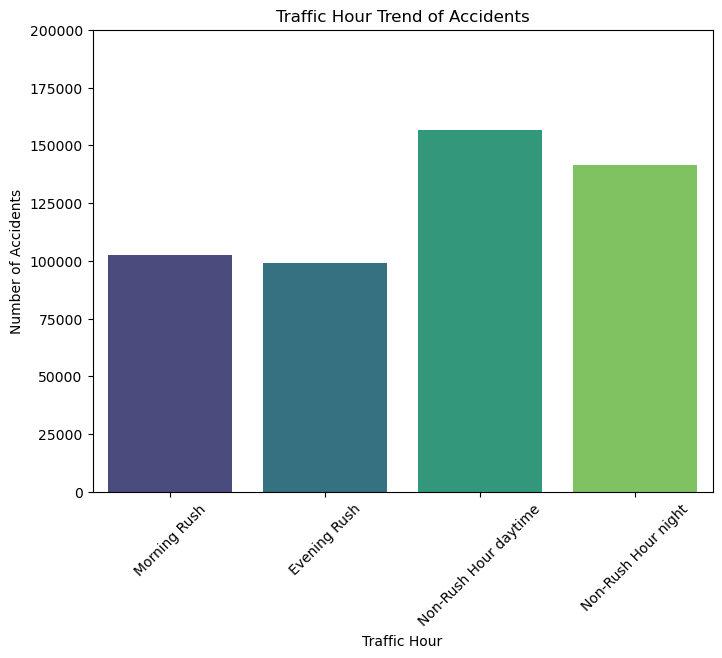

In [14]:
# traffic time trend
def traffic_hour(hour):
    if 7 <= hour < 10:
        return 'Morning Rush'
    elif 16 <= hour < 19:
        return 'Evening Rush'
    elif hour in [10, 11, 12, 13, 14, 15]:
        return 'Non-Rush Hour daytime'
    else:
        return 'Non-Rush Hour night'
    
basic_df['Traffic_Hour'] = basic_df['Hour'].apply(traffic_hour)
traffic_hour_trend = basic_df['Traffic_Hour'].value_counts().sort_index()
print(traffic_hour_trend)

plt.figure(figsize = (8, 6))
sns.barplot(x = traffic_hour_trend.index, y = traffic_hour_trend.values, palette = 'viridis')
plt.title ('Traffic Hour Trend of Accidents')
plt.xlabel ('Traffic Hour')
plt.ylabel ('Number of Accidents')
plt.ylim(0, 200000)
plt.xticks(range(4), ['Morning Rush', 'Evening Rush', 'Non-Rush Hour daytime', 'Non-Rush Hour night'], rotation = 45)
plt.show()

# severity with time trend

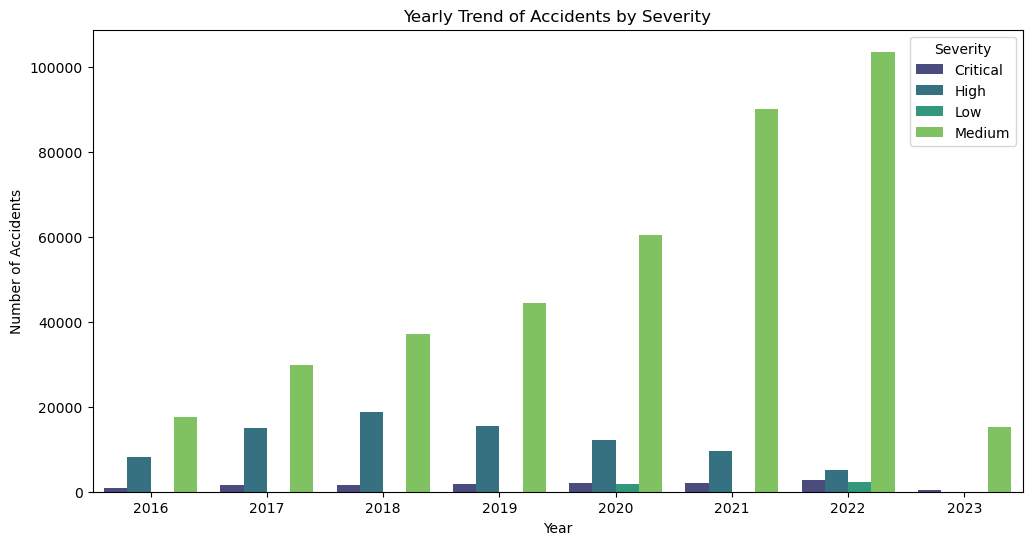

In [15]:
# Extract year from 'Start_Time'
basic_df['Year'] = basic_df['Start_Time'].dt.year

# Group by year and severity, then count the accidents
yearly_severity_trend = basic_df.groupby(['Year', 'Severity']).size().reset_index(name='count')

# plot the trend vs severity
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_severity_trend, x='Year', y='count', hue='Severity', palette='viridis')
plt.title('Yearly Trend of Accidents by Severity')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.show()




In [16]:
# import plotly.express as px
# # Create a Plotly bar plot
# fig = px.bar(yearly_severity_trend, 
#              x='Year', 
#              y='count', 
#              color='Severity', 
#              barmode='stack', 
#              title='Accident Severity Trend by Year')

# fig.show(renderer="browser")


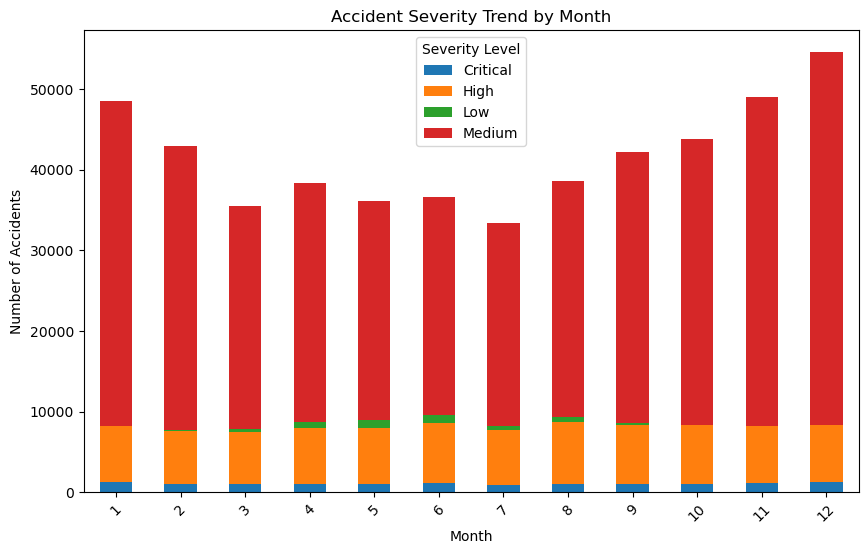

In [17]:
# severity by month
monthly_severity_trend = basic_df.groupby(['Month', 'Severity']).size().unstack()
monthly_severity_trend = monthly_severity_trend.reindex(range(1, 13))
monthly_severity_trend.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accident Severity Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity Level')
plt.show()


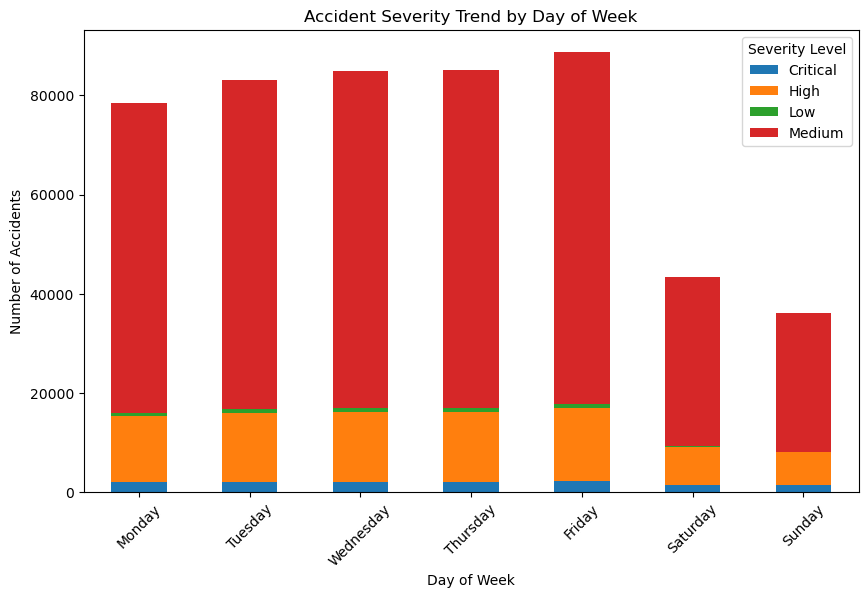

In [18]:
# severity by day of week

weekly_severity_trend = basic_df.groupby(['Day_of_Week', 'Severity']).size().unstack()
weekly_severity_trend = weekly_severity_trend.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekly_severity_trend.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accident Severity Trend by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity Level')
plt.show()


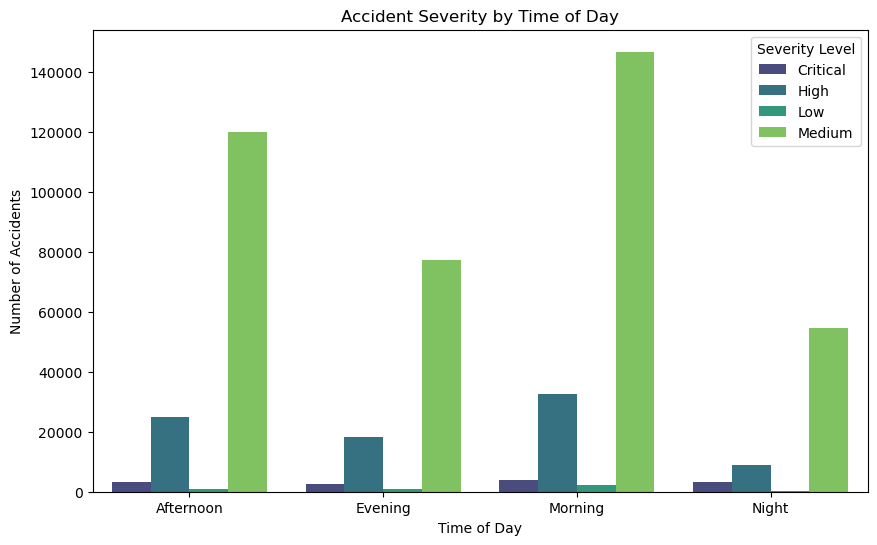

In [19]:
# severity by time of day
time_of_day_severity_trend = basic_df.groupby(['Time_of_Day', 'Severity']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=time_of_day_severity_trend, x='Time_of_Day', y='Count', hue='Severity', palette='viridis')
plt.title('Accident Severity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity Level')
plt.show()

# city analysis


          City  count
0        Miami  12141
1      Houston  11031
2  Los Angeles  10299
3    Charlotte   8979
4       Dallas   8245
5      Orlando   6985
6       Austin   6269
7      Raleigh   5553
8    Nashville   4689
9  Baton Rouge   4625


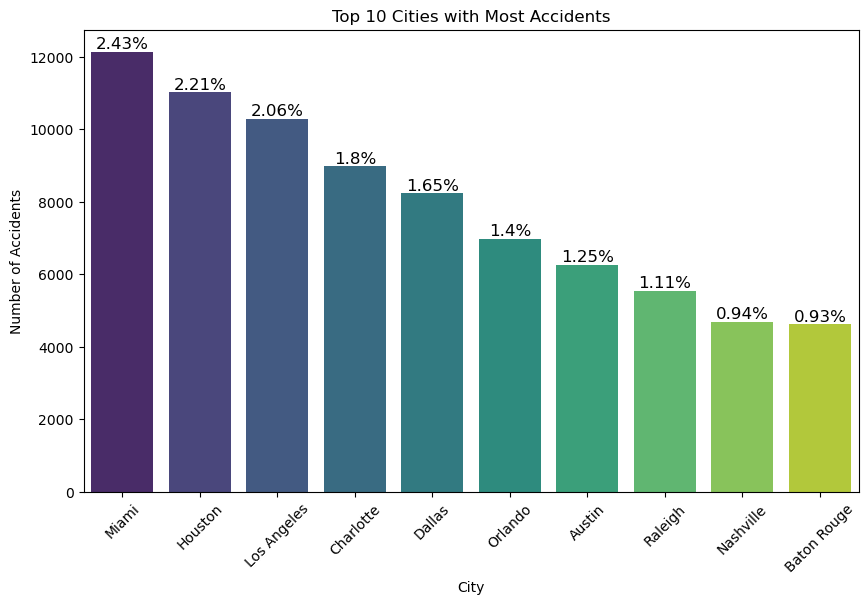

In [20]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(basic_df['City'].value_counts()).reset_index()
top_10_cities = pd.DataFrame(city_df.head(10))
print(top_10_cities)

total = city_df['count'].sum()
# Plot the top 10 cities with most accidents
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10_cities, x='City', y='count', palette='viridis')

# Add title and labels
plt.title('Top 10 Cities with Most Accidents')  
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

# Add annotations
for p in ax.patches:
    height = p.get_height()  # Get the height (the number of accidents)
    percentage = height / total * 100
    percentage_str = f"{round(percentage, 2)}%" 
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Adjust text position
            percentage_str,  # Display percentage as text
            ha='center', va='bottom', fontsize=12, color='black')  # Add text at the top of each bar

# Show the plot
plt.show()


In [21]:
# basic_df.loc[basic_df['City'] == 'Los Angeles'] 
top_10_city_geo_df = basic_df.loc[basic_df['City'].isin(top_10_cities['City'])]
fig = px.scatter_geo(top_10_city_geo_df,
                     lat='Start_Lat',
                     lon='Start_Lng',
                     color='Severity',
                     hover_name='City',
                     size_max=15,
                     title='Accidents in Top 10 Cities')

fig.update_geos(scope = 'usa', 
                projection_type = 'albers usa', 
                visible = True, 
                showcoastlines = True, 
                coastlinecolor = 'Black', 
                landcolor = 'rgb(217, 217, 217)', 
                subunitcolor = 'rgb(255, 255, 255)', 
                countrycolor = 'rgb(255, 255, 255)', 
                showsubunits = True)    

fig.show(renderer="browser")

In [22]:
basic_df[['Start_Lat', 'Start_Lng']].isna().sum() # ensure no missing values in lat and lng

Start_Lat    0
Start_Lng    0
dtype: int64

In [23]:
fig = px.scatter_geo(basic_df,
                     lat='Start_Lat',
                     lon='Start_Lng',
                     color='Severity',
                     hover_name='City',
                     hover_data= {'Street': True, 'City': True, 'State': True, 'Zipcode': True, 'Country': True, 'Timezone': True},
                     title='Accidents by City and Severity',
                     color_continuous_scale=px.colors.sequential.Viridis,
                     template='plotly_dark')

fig.update_geos(scope = 'usa', projection_type = 'albers usa')

fig.show(renderer="browser")

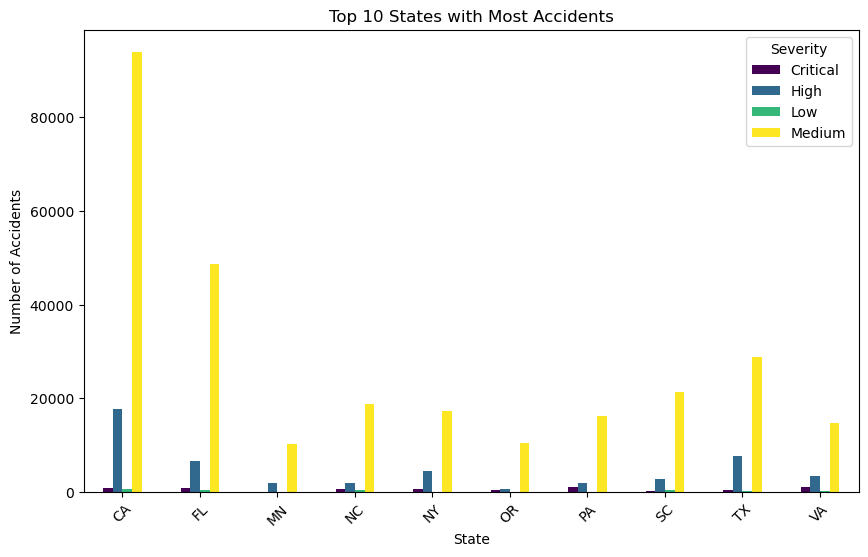

In [24]:
top_10_state_name = basic_df['State'].value_counts().head(10).index
top_10_state_severity = basic_df.loc[basic_df['State'].isin(top_10_state_name)].groupby(['State', 'Severity']).size().unstack().fillna(0)

top_10_state_severity.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Top 10 States with Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.show()


In [25]:


fig = px.bar(top_10_state_severity,
             x=top_10_state_severity.index,
             y=top_10_state_severity.columns,
             title='Top 10 States with Most Accidents by Severity',
             labels={'value': 'Number of Accidents', 'index': 'State'},
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(barmode='stack')
fig.show(renderer="browser")

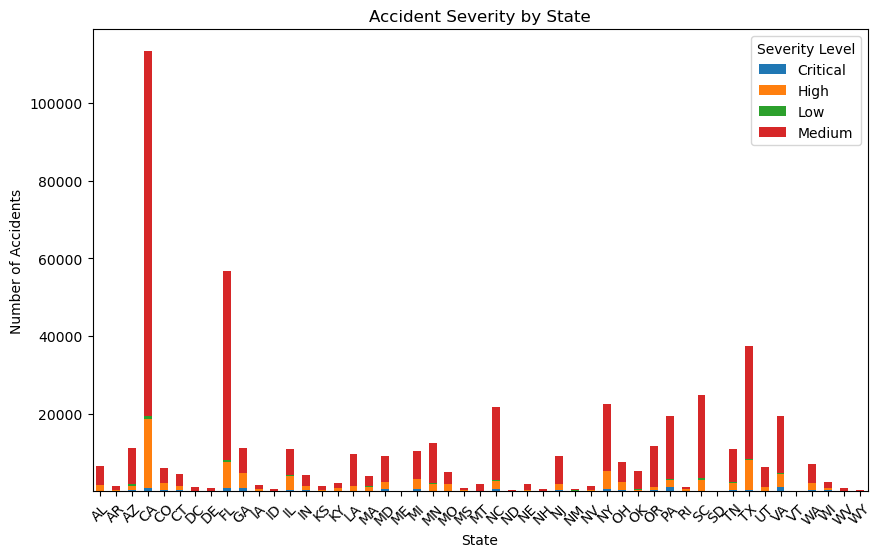

In [26]:

basic_df.groupby(['State','Severity']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accident Severity by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity Level')
plt.show()

# State analysis


In [1]:
top_10_state_name = basic_df['State'].value_counts().sort_values(ascending=False).head(10).index
top_10_state_df = basic_df.loc[basic_df['State'].isin(top_10_state_name)]

state_severity_counts = basic_df.groupby(['State', 'Severity']).size().unstack(fill_value=0)
#state_severity_counts.columns = ['severity_1', 'severity_2', 'severity_3', 'severity_4']
top_10_state_df = top_10_state_df.join(state_severity_counts, on='State')


fig = px.scatter_geo(top_10_state_df,
                        lat='Start_Lat',
                        lon='Start_Lng',
                        color='Severity',
                        color_continuous_scale=px.colors.sequential.Viridis,
                        hover_data={
                            'State': True,
                            'Critical': True,
                            'High': True,
                            'Low': True,
                            'Medium': True
                        },
                        hover_name='State',
                        size_max=15,
                        title='Accidents in Top 10 States')

fig.update_geos(scope = 'usa',
                projection_type = 'albers usa', 
                visible = True, 
                showcoastlines = True, 
                coastlinecolor = 'Black', 
                landcolor = 'rgb(217, 217, 217)', 
                subunitcolor = 'rgb(255, 255, 255)', 
                countrycolor = 'rgb(255, 255, 255)', 
                showsubunits = True)
fig.show(renderer="browser")


NameError: name 'basic_df' is not defined

from the state geo plot, there is street pattern, so we do the street analysis



In [29]:
state_accident = basic_df.groupby('State_Code').agg(
    accident_count=('ID', 'count'),
    severity_Low = ('Severity', lambda x: (x == 'Low').sum()),
    severity_Medium = ('Severity', lambda x: (x == 'Medium').sum()),
    severity_High = ('Severity', lambda x: (x == 'High').sum()),
    severity_Critical = ('Severity', lambda x: (x == 'Critical').sum())
    )

state_accident.reset_index(inplace=True)
state_accident

fig = px.choropleth(
    state_accident,
    locations='State_Code',
    locationmode='USA-states',
    color='accident_count',
    hover_name='State_Code',
    hover_data=['severity_Low', 'severity_Medium', 'severity_High', 'severity_Critical'],
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Accidents by State'
)
fig.update_geos(scope='usa', projection_type='albers usa')
fig.show(renderer="browser")

KeyError: 'State_Code'